# Moore Machines
This notebook explores implementing the [finite state](https://en.wikipedia.org/wiki/Finite-state_machine) machine of a moore diagram with a [wiring diagram](https://algebraicjulia.github.io/Catlab.jl/dev/generated/wiring_diagrams/wiring_diagram_basics/) from Catlab and a [discrete machine](https://algebraicjulia.github.io/AlgebraicDynamics.jl/dev/api/#AlgebraicDynamics.DWDDynam.DiscreteMachine) from AlgebraicDynamics.

In [1]:
# Libraries
using AlgebraicDynamics
using AlgebraicDynamics.DWDDynam
using Catlab.WiringDiagrams
using Catlab.Graphics
using Catlab.Graphics.Graphviz
using DynamicalSystems       
using DifferentialEquations

In [2]:
show_diagram(d::WiringDiagram) = to_graphviz(d, orientation=LeftToRight, labels=true)

show_diagram (generic function with 1 method)

In [3]:
# Display table of results from moore machine.

function printResult(x, s)
    # Legend
    println("x | s")
    println("-----")
    # Rows
    for i = 1:length(x)
        println( x[i], " | ", s[i] )
    end
end

printResult (generic function with 1 method)

---
## Simple graph

<img src="https://raw.githubusercontent.com/rgCategory/composition_notebook/main/images/moore_machine_crop.png" width="40%">

The behavior of the above diagram can be thought of in terms of an update function and a readout function. For a given input, the update function modifies the state and the readout function returns a value associated with the state. This reduces the diagram to a simple box that receives and outputs a value.

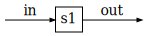

In [4]:
diagram = WiringDiagram([:in], [:out])

s1 = add_box!(diagram, Box(:s1, [:in], [:out]))

add_wires!( diagram, [
            (input_id(diagram), 1) => (s1, 1)
            (s1, 1) => (output_id(diagram), 1) ])

show_diagram(diagram)

We can implement the logic of the moore machine through a series of if statements. These statements are are triggered by a single external input. They can be evaluated with the update function of a discrete machine.

In [5]:
# States of system
STATE_1 = 1
STATE_2 = 2

function update(u, x, p, t) 
    # Retrieve input
    x = x[1][t > 0 ? t : 1]  # Ignore 0 index
    
    # Update state
    if x == 0 && u[1] == STATE_1
        u[1] = STATE_2
    elseif x == 1 && u[1] == STATE_2
        u[1] = STATE_1
    end
    
    # State update
    return u
end

function readout(u) 
    r = 0
    # State S1
    if u[1] == STATE_1
        r = 0
    # State S2
    elseif u[1] == STATE_2
        r = 1
    end
    return [r]
end

readout (generic function with 1 method)

In [6]:
# Initial values
So = [STATE_1];              # Initial state
Xo = [ [1, 0, 0, 1, 1,0] ]   # Array of inputs with respect to time 
tmax = length( Xo[1] )      # Defines maximum value of t
tspan = (0, tmax)

# Define machine - has the same inputs as a ContinousMachine
machine = DiscreteMachine{Int64}(1, 1, 1, update, readout)

# Solve system
system = DiscreteProblem(machine, So, Xo, tspan, nothing)
sol = solve(system);

By solving the system for a list of arbitrary inputs, we can observe the behavior of the moore machine. The inputs along with the current state of the system determine the next state. 

In [7]:
# NOTE: solution is synchronized with inputs
printResult(Xo[1], sol[2:end])

x | s
-----
1 | [1]
0 | [2]
0 | [2]
1 | [1]
1 | [1]
0 | [2]
